<a href="https://colab.research.google.com/github/StrikerEureka34/Regression_Level2/blob/main/LinearRegression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [220]:
import pandas as pd
import numpy as np
path="/content/drive/MyDrive/data_sets/archive (2)/Salary_dataset.csv"

In [221]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [222]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
salary_data = pd.read_csv(path)

In [238]:
class Linear_Regression():

    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        for _ in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self):
        Y_prediction = self.predict(self.X)
        dw = -2 * (self.X.T.dot(self.Y - Y_prediction)) / self.m
        db = -2 * np.sum(self.Y - Y_prediction) / self.m

        # Ensure gradients are not NaN or infinite
        #Was getting some unexpected error here so asked gpt for resolution.
        dw = np.nan_to_num(dw)
        db = np.nan_to_num(db)

        self.w -= self.learning_rate * dw
        self.b -= self.learning_rate * db

    def predict(self, X):
        return X.dot(self.w) + self.b

In [224]:
salary_data.drop('Unnamed: 0',axis=1,inplace=True)
salary_data.head()


,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [225]:
salary_data.tail()

,YearsExperience,Salary
25,9.1,105583.0
26,9.6,116970.0
27,9.7,112636.0
28,10.4,122392.0
29,10.6,121873.0


In [226]:
salary_data.shape

(30, 2)

In [227]:
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


In [228]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [229]:
print(X)
print(Y)

[[ 1.2]
 [ 1.4]
 [ 1.6]
 [ 2.1]
 [ 2.3]
 [ 3. ]
 [ 3.1]
 [ 3.3]
 [ 3.3]
 [ 3.8]
 [ 4. ]
 [ 4.1]
 [ 4.1]
 [ 4.2]
 [ 4.6]
 [ 5. ]
 [ 5.2]
 [ 5.4]
 [ 6. ]
 [ 6.1]
 [ 6.9]
 [ 7.2]
 [ 8. ]
 [ 8.3]
 [ 8.8]
 [ 9.1]
 [ 9.6]
 [ 9.7]
 [10.4]
 [10.6]]
[ 39344.  46206.  37732.  43526.  39892.  56643.  60151.  54446.  64446.
  57190.  63219.  55795.  56958.  57082.  61112.  67939.  66030.  83089.
  81364.  93941.  91739.  98274. 101303. 113813. 109432. 105583. 116970.
 112636. 122392. 121873.]


In [230]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [231]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state = 2)
model = Linear_Regression(learning_rate = 0.02, no_of_iterations=1000)
model.fit(X_train, Y_train)

In [232]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(20, 1) (10, 1) (20,) (10,)


In [233]:
model.fit(X_train, Y_train)
print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  26542.915996043143
bias =  74254.26094750222


In [234]:
test_data_prediction = model.predict(X_test)

In [235]:
print(test_data_prediction)

[ 36075.64173049  34173.05273297  66517.0656909   58906.7097008
  91250.72265873  80786.48317234 101714.96214512  52247.64820946
  42734.70322183  88396.83916244]


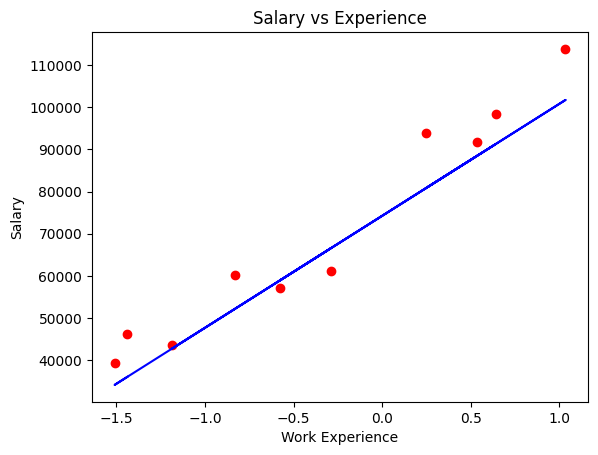

In [236]:
plt.scatter(X_test[:, 0], Y_test, color='red')
plt.plot(X_test[:, 0], test_data_prediction, color='blue')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()

In [237]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, Y_pred)
print(f"R-squared Score: {r2}")

R-squared Score: 0.9041801644162597
